---

Applied Statistics

# Problem sheet: Rank correlation

---

### 1. Analyzing Ordinal Data in Penguins' Size and Fish Consumption

Objective: Investigate the relationship between the size of penguins and their fish consumption levels using ordinal data analysis techniques.

The dataset in `fish_consumption.pkl` consists of 300 simulated penguin records with two attributes:

* Size: Categorized as Small, Medium, or Large.
* Fish Consumption: Categorized as Low, Medium, or High.


#### a) Import necessary libraries and load the dataset into a pandas DataFrame. Display the first few rows to understand the dataset's structure.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
data_fish = pd.read_pickle("fish_consumption.pkl")
data_fish.head()

,Size,fish_consumption
0,Medium,Low
1,Large,Low
2,Large,Low
3,Medium,Low
4,Small,Medium


#### b) Create a visualization that shows the relationship between penguin size and fish consumption. Hint: A count plot with hues or stacked bars could be insightful.

<Axes: xlabel='Size', ylabel='count'>

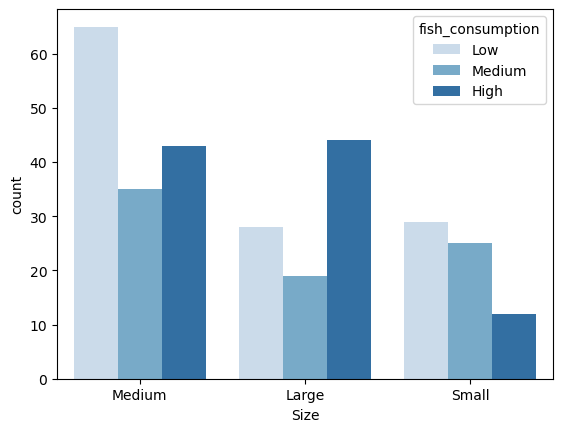

In [3]:
sns.countplot(x='Size', hue='fish_consumption', data=data_fish, palette='Blues')

#### c) Ordinal variables need to be appropriately encoded before analysis.  
Encode the "Size" and "Fish Consumption" variables based on their ordinal nature, with values indicating their order (e.g., Small = 1, Medium = 2, Large = 3).

In [4]:
mapper_size = {'Small': 1, 'Medium': 2, 'Large': 3}
data_fish['Size_ordinal'] = data_fish['Size'].replace(mapper_size)

mapper_fish = {'Low': 1, 'Medium': 2, 'High': 3}
data_fish['fish_consumption_ordinal'] = data_fish.fish_consumption.replace(mapper_fish)

We sort the data and plot it again:

<Axes: xlabel='Size', ylabel='count'>

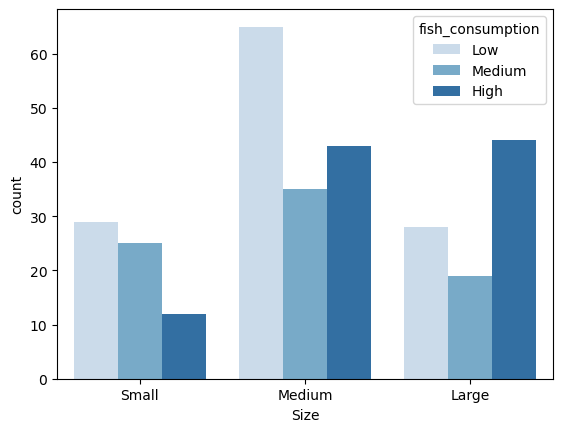

In [5]:
data_fish.sort_values(['Size_ordinal', 'fish_consumption_ordinal'], inplace=True)
sns.countplot(x='Size', hue='fish_consumption', data=data_fish, palette='Blues')

#### d) Analyze the relationship between the size of the penguins and their fish consumption levels using Spearman's rank correlation coefficient, carry out a correlation test and interpret the result.

In [6]:
spearman_corr, spearman_p_value = stats.spearmanr(data_fish['Size_ordinal'], data_fish['fish_consumption_ordinal'])

print(f"Spearman's Correlation Coefficient: {spearman_corr:.3f}")
print(f"P-value: {spearman_p_value:.3f}")


Spearman's Correlation Coefficient: 0.187
P-value: 0.001


There's a statistically significant (monotonic) relationship between the size and the fish consumption. However, the association is weak.

#### e) Would it also make sense to compute a Pearson correlation? Why (or why not)?

No, the Pearson correlation is not meaningful for ordinal variables.

### 2. Spearman's Rank Correlation vs. Pearson's Correlation

#### a) Compute Pearson's Correlation Coefficient and Spearman's Rank Correlation Coefficient for the data in `corr_data.pkl`.

In [7]:
df = pd.read_pickle('corr_data.pkl')

# Calculate correlations
pearson_corr = df['X'].corr(df['Y'], method='pearson')
spearman_corr = df['X'].corr(df['Y'], method='spearman')

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

Pearson correlation: 0.3903403606560952
Spearman correlation: 0.8936813681368136


#### b) What do you observe from the results?

Spearman's Rank Correlation Coefficient is much larger than Pearson's Correlation Coefficient because the relationship is not linear.

#### c) Visualize the data to confirm your answer.

<Axes: xlabel='X', ylabel='Y'>

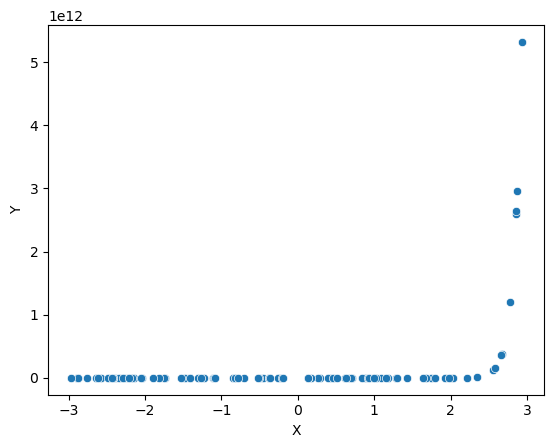

In [8]:
sns.scatterplot(x='X', y='Y', data=df)